In [4]:
from OPUS.utils.PlotHandler import PlotData
from OPUS.utils.MocatParameters import configure_mocat
from OPUS.utils.MultiSpecies import MultiSpecies
import matplotlib.pyplot as plt
import os
import json

scenario_files=[
                    "Baseline",
                    # "bond_0k_25yr",
                    "bond_100k",
                    # # "bond_200k",
                    "bond_300k",
                    # # "bond_500k",
                    "bond_800k",
                    # # "bond_100k_25yr",
                    # # "bond_200k_25yr",
                    # "bond_300k_25yr",
                    # # "bond_500k_25yr",
                    # "bond_800k_25yr",
                    # # "tax_1",
                    # "tax_2"
                ]
    
MOCAT_config = json.load(open("./OPUS/configuration/multi_single_species.json"))

simulation_name = "Single-Species"
    
    
multi_species_names = ["Su"]

# This will create a list of OPUSSpecies objects. 
multi_species = MultiSpecies(multi_species_names)


In [5]:
MOCAT,_ = configure_mocat(MOCAT_config, multi_species=multi_species)

Added 2 active species, 2 debris species, and 1 rocket body species to the simulation.
Pairing the following active species to debris classes for PMD modeling...
['S', 'Su']
No matching mass debris species found for species S with mass 500.
Matched species Su to debris species N_223kg.
    Name: N
    pmd_linked_species: []
    Name: N_223kg
    pmd_linked_species: ['Su']


Creating collision pairs: 100%|██████████| 15/15 [00:01<00:00,  8.72it/s]


Using launch file: pyssem/utils/launch/data/ref_scen_SEP1.csv

Species class distribution:
species_class
N          54704
S           6906
Su          3356
Unknown     2536
B           2082
Name: count, dtype: int64
No unknown species classes found.

Species class distribution:
species_class
N          54704
S           6906
Su          3356
Unknown     2536
B           2082
Name: count, dtype: int64
No unknown species classes found.
Number of objects for each species in T_new: species
N          54554
S           6906
Su          3356
B           2082
N_223kg      150
Name: count, dtype: int64


/opt/anaconda3/envs/pyssem-env/lib/python3.10/site-packages/pyssem/utils/launch/launch.py:407: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x0_summary = pd.DataFrame(index=range(scen_properties.n_shells), columns=scen_properties.species_names).fillna(0)
Processing Time Steps: 100%|██████████| 10/10 [00:00<00:00, 851.79it/s]


You have these species in the model:  ['S', 'Su', 'N', 'N_223kg', 'B']
Using the default economic parameters for the species:  N
Key 'OPUS' not found in the dictionary for species 'N 
 Please include if you want to use the economic parameters in the model.
Using the default economic parameters for the species:  B
Key 'OPUS' not found in the dictionary for species 'B 
 Please include if you want to use the economic parameters in the model.


Generating plots for scenario:  Baseline
Creating plot: ror_cp_and_launch_rate
Saved time evolution plot: Results/Single-Species/Baseline/time_evolution_year1_species1.png
Saved time evolution plot: Results/Single-Species/Baseline/time_evolution_year2_species1.png
Saved time evolution plot: Results/Single-Species/Baseline/time_evolution_year3_species1.png
Saved time evolution plot: Results/Single-Species/Baseline/time_evolution_year4_species1.png
Saved time evolution plot: Results/Single-Species/Baseline/time_evolution_year5_species1.png
Generating plots for scenario:  bond_100k
Creating plot: ror_cp_and_launch_rate
Saved time evolution plot: Results/Single-Species/bond_100k/time_evolution_year1_species1.png
Saved time evolution plot: Results/Single-Species/bond_100k/time_evolution_year2_species1.png
Saved time evolution plot: Results/Single-Species/bond_100k/time_evolution_year3_species1.png
Saved time evolution plot: Results/Single-Species/bond_100k/time_evolution_year4_species1.png


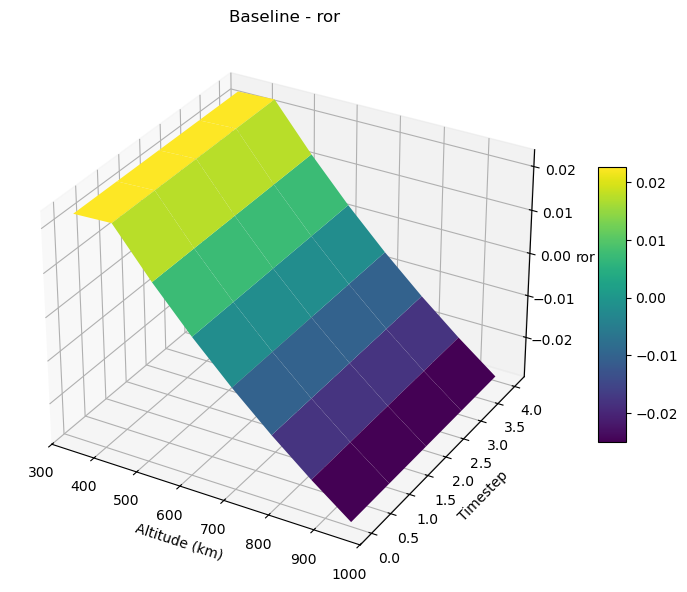

Saved surface plot: Results/Single-Species/comparisons/surface_plots/Baseline/ror_surface.png


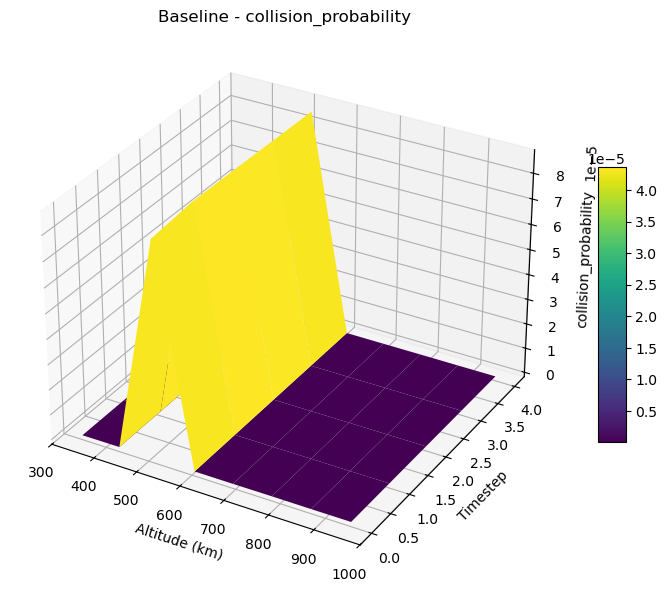

Saved surface plot: Results/Single-Species/comparisons/surface_plots/Baseline/collision_probability_surface.png


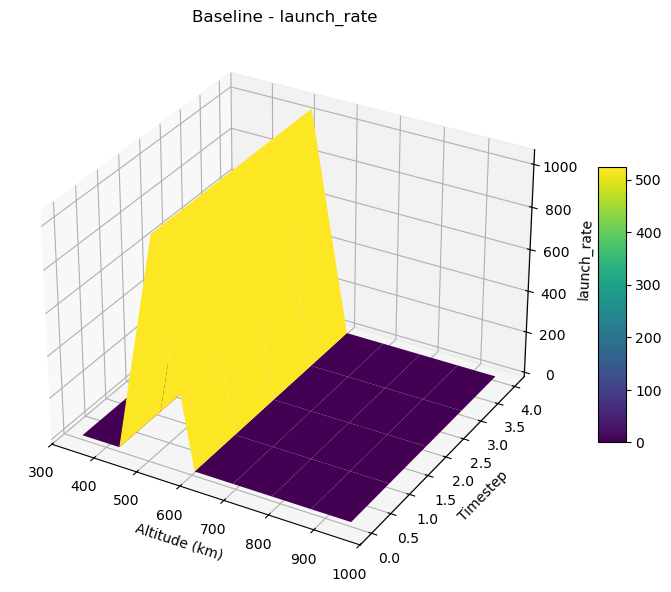

Saved surface plot: Results/Single-Species/comparisons/surface_plots/Baseline/launch_rate_surface.png


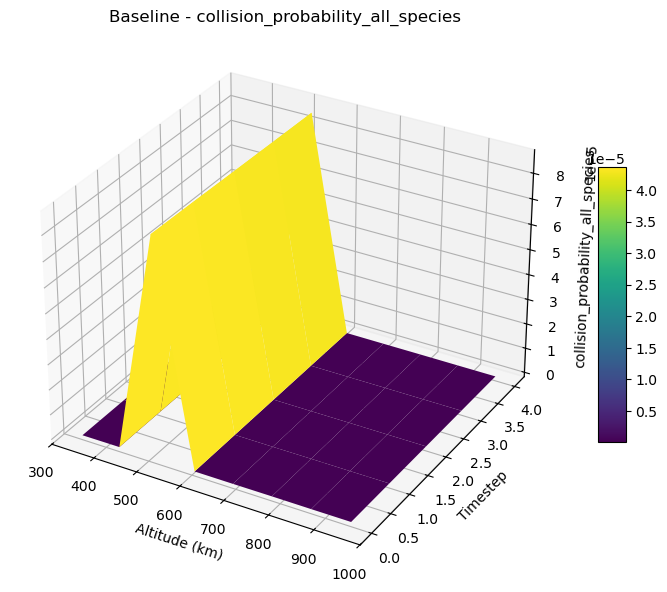

Saved surface plot: Results/Single-Species/comparisons/surface_plots/Baseline/collision_probability_all_species_surface.png


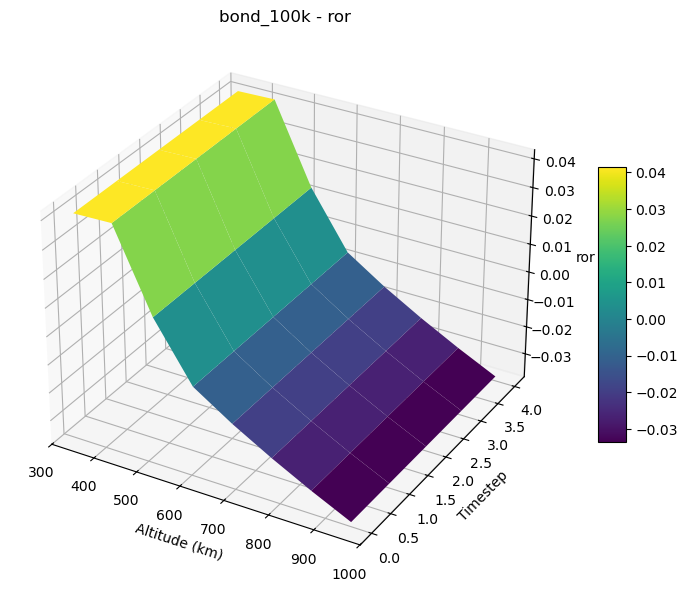

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_100k/ror_surface.png


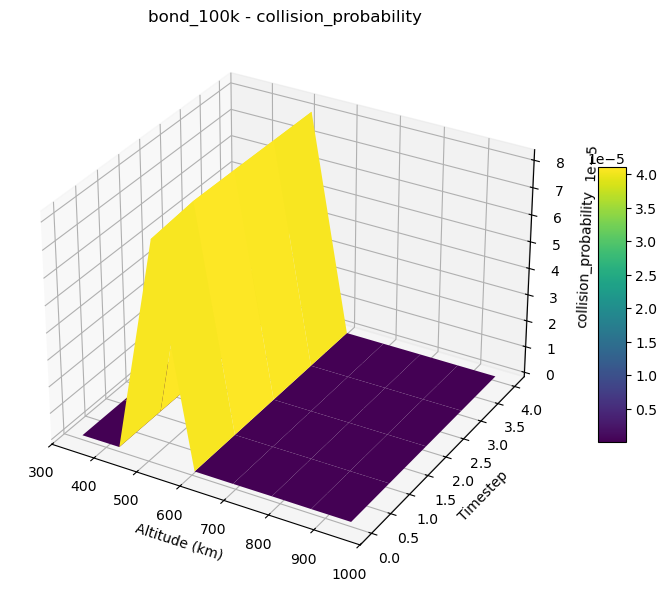

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_100k/collision_probability_surface.png


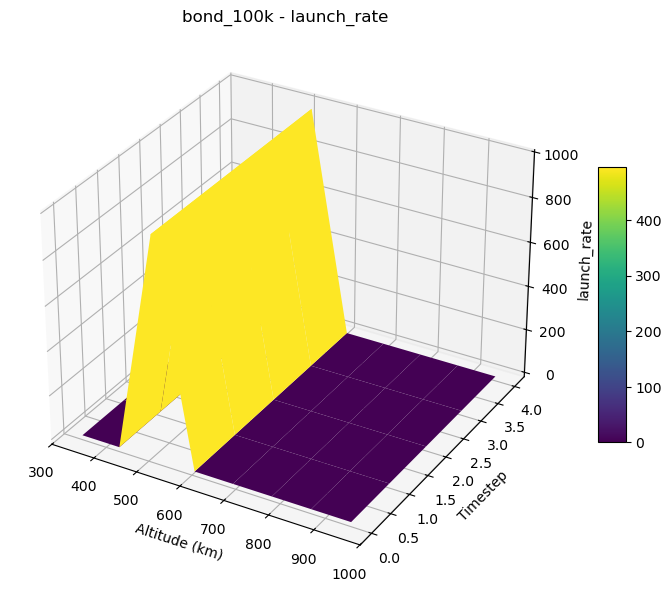

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_100k/launch_rate_surface.png


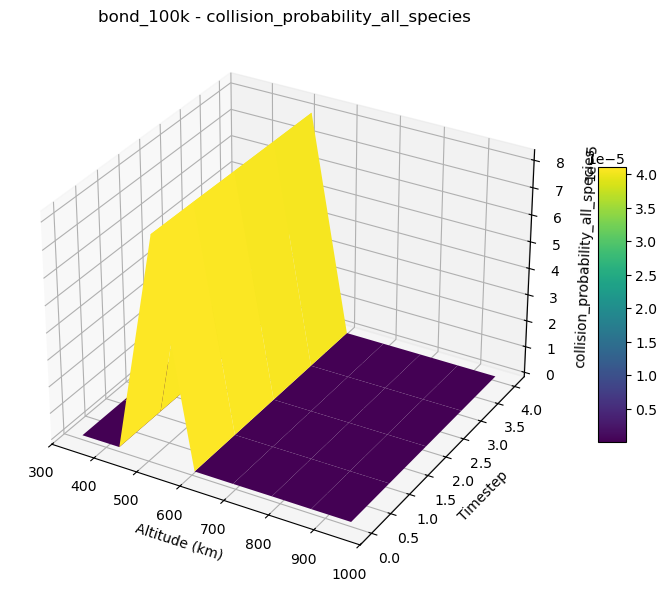

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_100k/collision_probability_all_species_surface.png


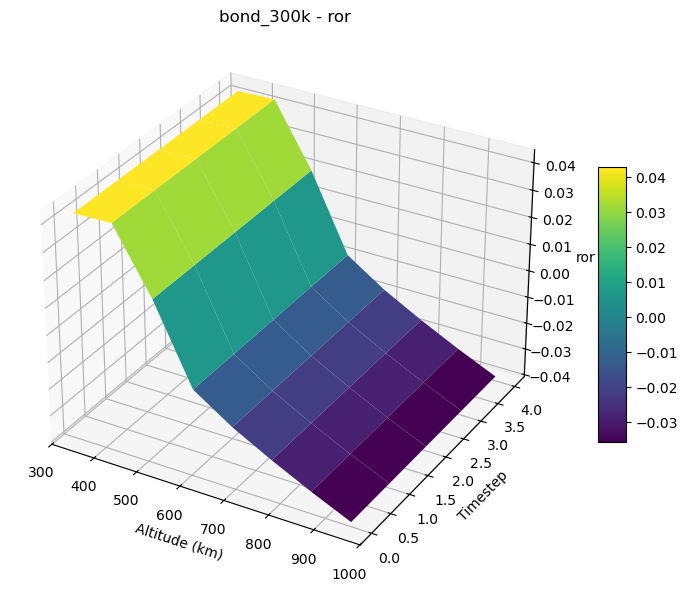

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_300k/ror_surface.png


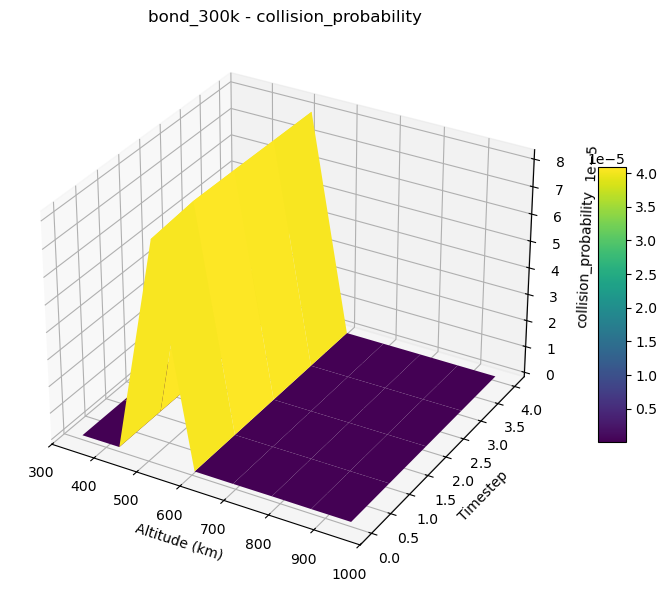

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_300k/collision_probability_surface.png


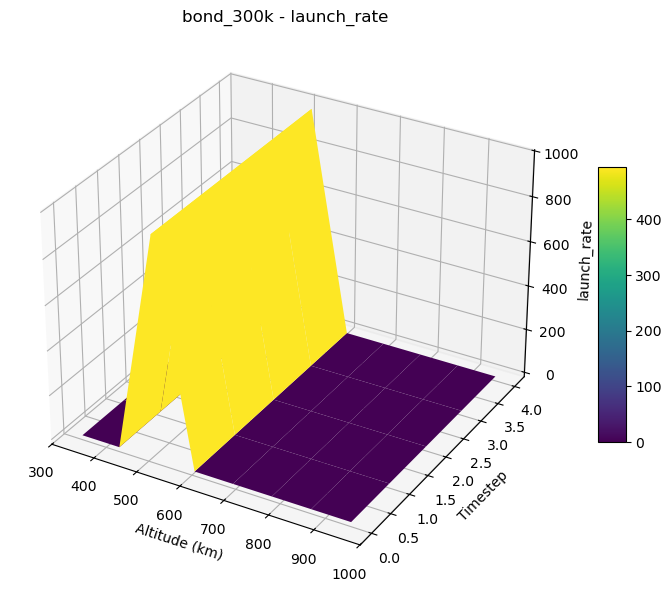

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_300k/launch_rate_surface.png


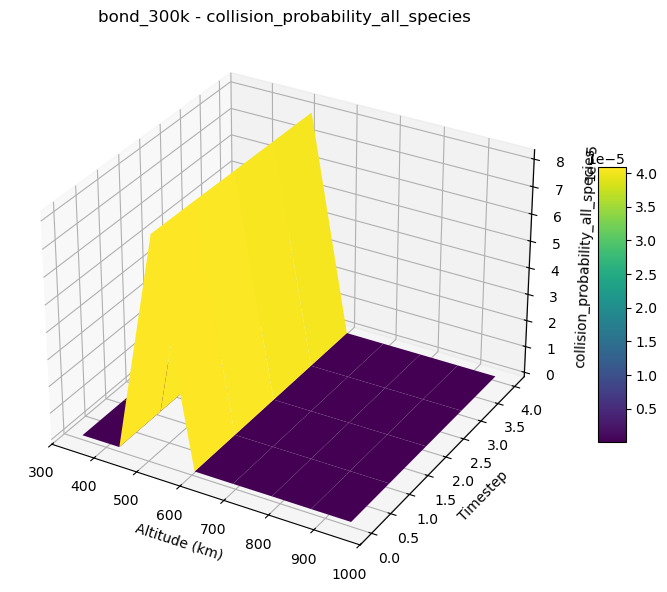

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_300k/collision_probability_all_species_surface.png


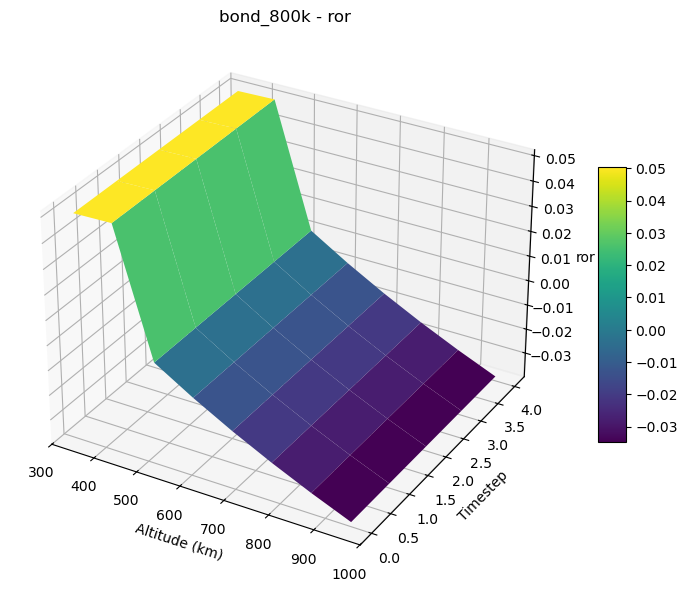

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_800k/ror_surface.png


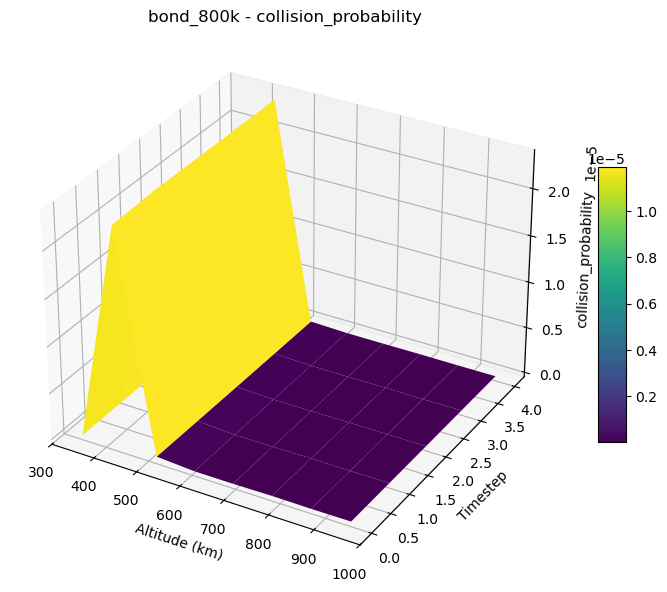

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_800k/collision_probability_surface.png


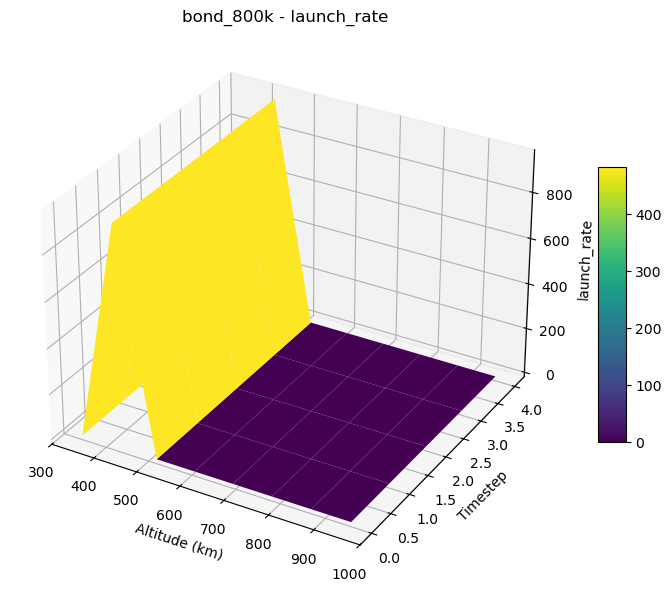

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_800k/launch_rate_surface.png


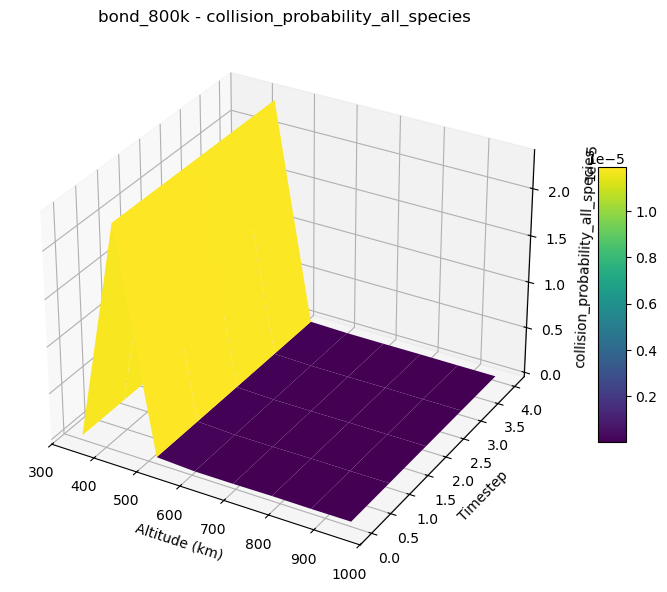

Saved surface plot: Results/Single-Species/comparisons/surface_plots/bond_800k/collision_probability_all_species_surface.png


In [7]:
import matplotlib.cm as cm
import numpy as np

class PlotHandler:  
        def __init__(self, MOCAT, scenario_files, simulation_name, plot_types=["all_plots"], comparison=True):
                """
                Initialize the PlotHandler.
                Comparison will compare all of the simulation names
                """
                
                self.MOCAT = MOCAT
                self.scenario_files = scenario_files # This will be a list of each sub-scenario run name
                self.simulation_name = simulation_name # This is the overall name of the simualtion 
                self.plot_types = plot_types # This will be a list of the types of plots to be generated
                self.HMid = self.MOCAT.scenario_properties.HMid
                self.n_shells = self.MOCAT.scenario_properties.n_shells

                # This will rely on the fact that there is a file available under the simulation name in the Results folder. 
                self.simulation_folder = os.path.join("Results", self.simulation_name)
                
                # if not show error to the user
                if not os.path.exists(self.simulation_folder):
                        print(f"Error: {self.simulation_folder} does not exist.")
                        return
                
                plot_data_list = []
                other_data_list = []
                econ_params_list = []

                # Loop through the scenario files and generate the plots
                for scenario in self.scenario_files:
                        scenario_folder = os.path.join(self.simulation_folder, scenario)
                        if not os.path.exists(scenario_folder):
                                print(f"Error: {scenario_folder} folder does not exist. Skipping scenario...")
                                continue
                        else: 
                                print("Generating plots for scenario: ", scenario)

                                # Build a PlotData object and then pass to the plotting functions
                                plot_data = PlotData(scenario, scenario_folder, MOCAT)
                                other_data = plot_data.get_other_data()
                                econ_data = plot_data.econ_params

                                # Add to lists for comparison plots
                                plot_data_list.append(plot_data)
                                other_data_list.append(other_data)
                                econ_params_list.append(econ_data)

                                # If the plot_types is None, then generate all plots
                                if "all_plots" in self.plot_types:
                                        self.all_plots(plot_data, other_data, econ_data)
                                else:
                                        # Dynamically generate plots
                                        for plot_name in self.plots:
                                                plot_method = getattr(self, plot_name, None)
                                                if callable(plot_method):
                                                        print(f"Creating plot: {plot_name}")
                                                        plot_method()
                                                else:
                                                        print(f"Warning: Plot '{plot_name}' not found. Skipping...")

                if comparison:
                        self._comparison_plots(plot_data_list, other_data_list)
                
        def _comparison_plots(self, plot_data_lists, other_data_lists):
                """
                Run all plot functions that start with 'comparison_', ignoring others.
                """
                for attr_name in dir(self):
                        # Grab the attribute; see if it’s a callable (method)
                        attr = getattr(self, attr_name)
                        if callable(attr):
                        # Skip known special methods
                                if attr_name in ("__init__", "all_plots"):
                                        continue

                        # Only call if it starts with 'comparison_'
                        if attr_name.startswith("comparison_"):
                                print(f"Creating plot: {attr_name}")
                                plot_method = attr
                                plot_method(plot_data_lists, other_data_lists)

        def all_plots(self, plot_data, other_data, econ_params):
                """
                Run all plot functions, irrespective of the plots list.
                """
                for attr_name in dir(self):
                        if callable(getattr(self, attr_name)) and attr_name not in ("__init__", "all_plots"):
                                if not attr_name.startswith("_") and not attr_name.startswith("comparison_") and not attr_name.startswith("econ_"):
                                        print(f"Creating plot: {attr_name}")
                                        plot_method = getattr(self, attr_name)
                                        plot_method(plot_data, other_data)
                                elif attr_name.startswith("econ_"):
                                        print(f"Creating plot: {attr_name}")
                                        plot_method = getattr(self, attr_name)
                                        plot_method(plot_data.path, econ_params)

        def comparison_surface_plots(self, plot_data_lists, other_data_lists):
                """
                Generate 3D surface plots of scenario metrics over time and altitude.
                Metrics: ror, collision_probability, launch_rate, collision_probability_all_species.
                """
                import matplotlib.pyplot as plt
                from mpl_toolkits.mplot3d import Axes3D
                import numpy as np
                import os

                variables = [
                        "ror",
                        "collision_probability",
                        "launch_rate",
                        "collision_probability_all_species"
                ]

                output_folder = os.path.join(self.simulation_folder, "comparisons", "surface_plots")
                os.makedirs(output_folder, exist_ok=True)

                for plot_data, other_data in zip(plot_data_lists, other_data_lists):
                        scenario_name = getattr(plot_data, 'scenario', 'UnnamedScenario')
                        scenario_path = os.path.join(output_folder, scenario_name)
                        os.makedirs(scenario_path, exist_ok=True)

                        timesteps = sorted(other_data.keys(), key=int)
                        HMid = self.MOCAT.scenario_properties.HMid  # Altitude per shell

                        for var in variables:
                        # Skip if key missing or not list-like
                                if var not in other_data[timesteps[0]]:
                                        continue

                                try:
                                        # Assume 1D list per timestep; expand across HMid for surface
                                        Z = []
                                        for t in timesteps:
                                                val = other_data[t][var]
                                                Z.append(np.ones(len(HMid)) * val)
                                        Z = np.array(Z)
                                        T, A = np.meshgrid(np.arange(len(timesteps)), HMid, indexing='ij')

                                        # Plot surface
                                        fig = plt.figure(figsize=(8, 6))
                                        ax = fig.add_subplot(111, projection='3d')
                                        surf = ax.plot_surface(A, T, Z, cmap='viridis')
                                        ax.set_title(f"{scenario_name} - {var}")
                                        ax.set_xlabel("Altitude (km)")
                                        ax.set_ylabel("Timestep")
                                        ax.set_zlabel(var)

                                        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
                                        plt.tight_layout()

                                        save_path = os.path.join(scenario_path, f"{var}_surface.png")
                                        plt.show()
                                        plt.close()
                                        print(f"Saved surface plot: {save_path}")
                                except Exception as e:
                                        print(f"Skipping {var} for {scenario_name} due to error: {e}")

        def ror_cp_and_launch_rate(self, plot_data, other_data):
                """
                Generate and save separate plots for time evolution of different parameters
                (RoR, Collision Probability, Launch Rate), split by species.
                Each plot shows 3 subplots and corresponds to one species at one timestep.
                """
                import matplotlib.pyplot as plt
                import os

                # Extract and sort timesteps
                timesteps = sorted(other_data.keys(), key=int)

                for idx, timestep in enumerate(timesteps):
                        ror = other_data[timestep]["ror"]
                        collision_prob = other_data[timestep]["collision_probability"]
                        launch_rate = other_data[timestep]["launch_rate"]

                        # Infer number of species
                        num_species = len(ror) // self.n_shells

                        for species_idx in range(num_species):
                                start = species_idx * self.n_shells
                                end = (species_idx + 1) * self.n_shells

                                ror_slice = ror[start:end]
                                cp_slice = collision_prob[start:end]
                                lr_slice = launch_rate[start:end]

                                if len(ror_slice) != self.n_shells:
                                        print(f"Warning: Skipping timestep {timestep}, species {species_idx + 1} due to mismatched shell size.")
                                        continue

                                # Create plot figure
                                fig, axes = plt.subplots(1, 3, figsize=(18, 5))
                                fig.suptitle(f"Year {timestep} - Species {species_idx + 1}", fontsize=14)

                                axes[0].plot(self.HMid, ror_slice, color="tab:blue")
                                axes[1].plot(self.HMid, cp_slice, color="tab:orange")
                                axes[2].plot(self.HMid, lr_slice, color="tab:green")

                                axes[0].set_title("Rate of Return (RoR)")
                                axes[1].set_title("Collision Probability")
                                axes[2].set_title("Launch Rate")

                                for ax in axes:
                                        ax.set_xlabel("Shell - Mid Altitude (km)")
                                        ax.set_ylabel("Value")

                                plt.tight_layout(rect=[0, 0.03, 1, 0.95])

                                # Save plot
                                plot_name = f"time_evolution_year{timestep}_species{species_idx + 1}.png"
                                file_path = os.path.join(plot_data.path, plot_name)
                                plt.savefig(file_path, dpi=300, bbox_inches='tight')
                                plt.close()
                                print(f"Saved time evolution plot: {file_path}")   
plot_handler = PlotHandler(MOCAT, scenario_files, simulation_name, plot_types=["all_plots"], comparison=True)